# Importing Libraries

In [309]:
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier


# Read Dataset

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Datasets_PROJECTS/orders_data.xlsx")
data.head()

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹449.00,NaN,NaN,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹1,099.00",₹84.96,NaN,Delivered to buyer


# Checking Data set

In [ ]:
data.shape

(171, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_no      171 non-null    object
 1   order_date    171 non-null    object
 2   buyer         171 non-null    object
 3   ship_city     171 non-null    object
 4   ship_state    171 non-null    object
 5   sku           171 non-null    object
 6   description   171 non-null    object
 7   quantity      171 non-null    int64 
 8   item_total    153 non-null    object
 9   shipping_fee  145 non-null    object
 10  cod           47 non-null     object
 11  order_status  171 non-null    object
dtypes: int64(1), object(11)
memory usage: 16.2+ KB


*Creating a copy of main dataset*

In [ ]:
df = data.copy()

*Checking null values*

In [ ]:
df.isnull().sum()

order_no          0
order_date        0
buyer             0
ship_city         0
ship_state        0
sku               0
description       0
quantity          0
item_total       18
shipping_fee     26
cod             124
order_status      0
dtype: int64

*Performing cleaning(REPLACE MISSING VALUE, REPLACE SYMBOLS etc.)*

In [ ]:
df['ship_city'] = df['ship_city'].apply(lambda x: x.replace(',',''))

In [ ]:
df['shipping_fee'].fillna(data['shipping_fee'].mode()[0],inplace = True)

In [ ]:
df['item_total'].fillna(data['item_total'].mode()[0],inplace = True)

In [ ]:
df['cod'].fillna('Online',inplace = True)



*   Created Function for remove symbol




In [ ]:
def rem_sym(d,col):
  li = []
  for i in d[col]:
    li.append(i[1:])
  d.drop([col],axis=1,inplace= True)
  d[col]= li
  d[col]=d[col].apply(lambda x: x.replace(',',''))
  return "Symbols Removed"


In [ ]:
rem_sym(df,'item_total')
rem_sym(df,'shipping_fee')

'Symbols Removed'



*   Function for change data types



In [ ]:
def toNumeric(d, col):
  d[col] = pd.to_numeric(d[col])
  return "Type Converted"

In [ ]:
toNumeric(df,'item_total')
toNumeric(df,'shipping_fee')

'Type Converted'

In [307]:
df.dtypes

ship_state        int64
sku               int64
quantity          int64
cod               int64
order_status      int64
item_total      float64
shipping_fee    float64
Year              int64
Month             int64
Day               int64
dtype: object

# Extracting Data


In [ ]:
df['Year'] = pd.DatetimeIndex(df['order_date']).year
df['Month'] = pd.DatetimeIndex(df['order_date']).month_name()
df['Day'] = pd.DatetimeIndex(df['order_date']).day_name()

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1212: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


# Droping Feature

*Droping the columns which we do not need*

In [ ]:
df.drop(['order_no','order_date','buyer','description','ship_city'],axis = 1, inplace=True)

# Encoding Data

*Encoding String value to numeric*

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sku'] = le.fit_transform(df['sku'])
df['cod'] = le.fit_transform(df['cod'])
df['order_status'] = le.fit_transform(df['order_status'])
df['Month'] = le.fit_transform(df['Month'])
df['Day'] = le.fit_transform(df['Day'])
df['ship_state'] = le.fit_transform(df['ship_state'])



# Balancing Data

*Checking Whether Our Data Balanced or not*

In [ ]:
x = df.drop(['order_status'],axis = 1)
y = df['order_status']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


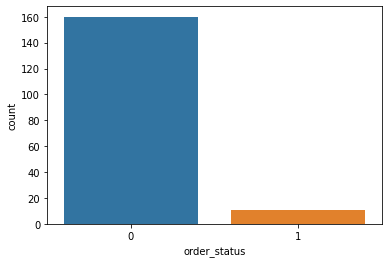

In [ ]:
sns.countplot(y)

*Balancing our data using smote*

In [ ]:
sm = SMOTE()
train , target = sm.fit_resample(x,y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


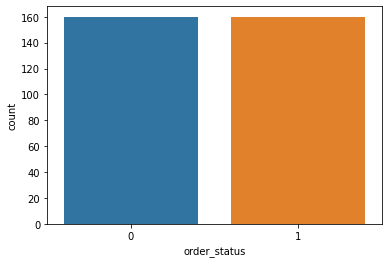

In [ ]:
sns.countplot(target)

# Feeding Model

*Spliting our data set into train and test, then training our model*
*, Here we have trained a Logistic Regression Model*

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(train,target, test_size= 0.20,random_state= 42)
LR = LogisticRegression()
LR.fit(x_train,y_train)
prediction = LR.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Result With Logistic Reg.

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        32
           1       0.84      1.00      0.91        32

    accuracy                           0.91        64
   macro avg       0.92      0.91      0.91        64
weighted avg       0.92      0.91      0.91        64



# Result With Decision Tree

*Here We Are Fitting our data into a Decition Tree Model*

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
result = model.score(x_test,y_test)
pred = model.predict(x_test)
print("Accuracy by using Decision Tree Classifier:",round(result*100))

Accuracy by using Decision Tree Classifier: 95


# Result With KFold Cross Validation

*Fitting our dataset into KFold*

In [ ]:
model = DecisionTreeClassifier()
KF_val = KFold(10)

result = cross_val_score(model,train,target,cv=KF_val)

res = pd.DataFrame(result)
res.columns = ['Val_Accuracy']
res

,Val_Accuracy
0,0.93750
1,0.93750
2,0.93750
3,0.84375
4,0.75000
5,0.96875
6,0.96875
7,1.00000
8,0.87500
9,0.96875


# Creating Dataset

*Checking The Prediction and Creating dataset for train test and result*

In [298]:
result = pd.DataFrame(y_test)
result['Prediction'] = pred

In [299]:
result.head()

,order_status,Prediction
167,0,0
230,1,1
25,0,0
63,0,0
9,0,0


In [300]:
train = pd.DataFrame(x_train)
train['order_status'] = y_train

In [305]:
test = pd.DataFrame(x_test)

In [306]:
train.to_csv('AOS_train.csv')
test.to_csv('AOS_test.csv')
result.to_csv('AOS_answer.csv')